# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Exc 1
X_train0 = pd.read_csv('./data/X_train.csv').drop('Unnamed: 0', axis=1).set_index('id_subject', append=True)
X_test = pd.read_csv('./data/X_test.csv').drop('Unnamed: 0', axis=1).set_index('id_subject', append=True)
y_train0 = pd.read_csv('./data_tarefa_1/UCI HAR Dataset/train/y_train.txt', header=None)
y_test = pd.read_csv('./data_tarefa_1/UCI HAR Dataset/test/y_test.txt', header=None)

y_train0.to_csv('./data/y_train.csv')
y_test.to_csv('./data/y_test.csv')

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [4]:
# Exc 2
X_train, X_validation, y_train, y_validation = train_test_split(X_train0, y_train0, test_size=.25, random_state=412)
X_validation.head(5)

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
,id_subject,,,,,,,,,,,,,,,,,,,,,
3177,16,0.215122,-0.047054,-0.149401,-0.455139,-0.347248,-0.217680,-0.458953,-0.347218,-0.222883,-0.402583,...,0.141018,-0.698400,-0.945916,0.346244,-0.146339,-0.943385,0.533186,-0.806774,0.015694,0.130444
5684,26,0.280030,-0.009544,-0.104637,-0.996975,-0.983637,-0.976743,-0.997349,-0.984341,-0.973120,-0.942040,...,0.507361,-0.471457,-0.799147,-0.003247,0.530048,-0.654112,-0.407818,-0.868955,0.183291,-0.014639
5595,26,0.269334,-0.018941,-0.142856,-0.379726,-0.257150,-0.310673,-0.424854,-0.300854,-0.338936,0.062942,...,0.137098,0.486530,0.246215,0.177202,0.669642,0.545369,0.636703,-0.846901,0.156140,-0.075041
387,3,0.231597,-0.023177,-0.064479,-0.936335,-0.894155,-0.923092,-0.945121,-0.899089,-0.916373,-0.914019,...,0.252122,-0.460588,-0.752429,0.083461,-0.115122,-0.061026,0.131926,-0.270096,-0.256746,-0.323259
4065,21,0.278375,-0.017858,-0.106276,-0.976056,-0.980729,-0.963624,-0.974480,-0.979468,-0.956419,-0.928084,...,0.345041,-0.444149,-0.787644,-0.235017,0.228328,0.690626,0.055317,0.333700,-0.388376,-0.576504


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [5]:
# Exc 3
clf = DecisionTreeClassifier(max_depth=4, random_state=412).fit(X_train, y_train)

importances = clf.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

feature_importances_df.head(3)

,Feature,Importance
52,tGravityAcc-min()-X,0.282634
83,tBodyAccJerk-std()-X,0.254961
559,"angle(Y,gravityMean)",0.163751


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

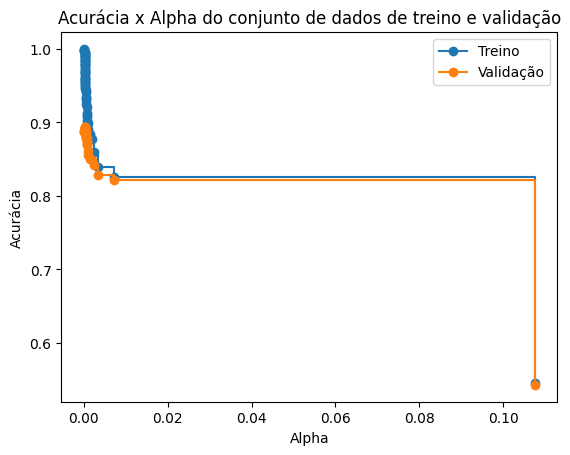

In [6]:
# Exc 4
X_train3 = X_train[[feature for feature in feature_importances_df.Feature][:3]]
X_validation3 = X_validation[[feature for feature in feature_importances_df.Feature][:3]]

clf = DecisionTreeClassifier(random_state=412)
path = clf.cost_complexity_pruning_path(X_train3, y_train)
ccp_alphas = path.ccp_alphas[::5]

clfs = []
for ccp_alpha in ccp_alphas:
    temp_tree = DecisionTreeClassifier(random_state=412, ccp_alpha=ccp_alpha).fit(X_train3, y_train)
    clfs.append(temp_tree)

train_scores = [clf.score(X_train3, y_train) for clf in clfs]
validation_scores = [clf.score(X_validation3, y_validation) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia x Alpha do conjunto de dados de treino e validação')
ax.plot(ccp_alphas, train_scores, marker='o', label='Treino',
        drawstyle='steps-post')
ax.plot(ccp_alphas, validation_scores, marker='o', label='Validação',
        drawstyle='steps-post')
ax.legend()
plt.show()

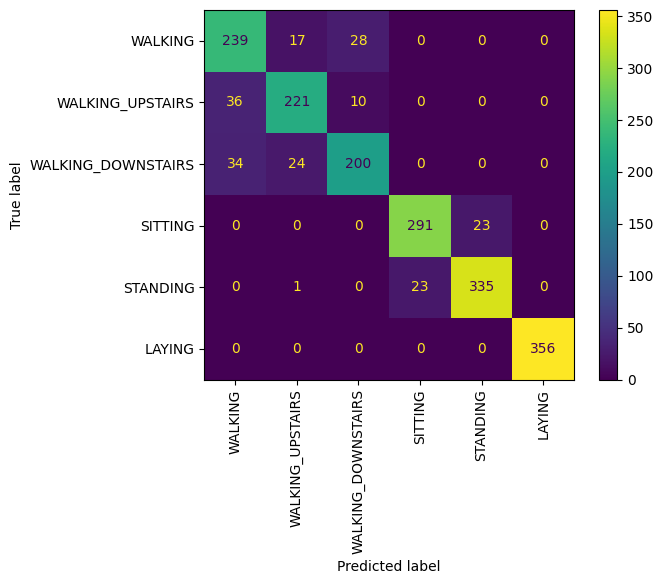

In [7]:
target = pd.read_csv('./data_tarefa_1/UCI HAR Dataset/activity_labels.txt', sep=' ', header=None, names=['id', 'label'])

best_tree = clfs[validation_scores.index(max(validation_scores))]

cm = confusion_matrix(y_validation, best_tree.predict(X_validation3))
disp = ConfusionMatrixDisplay(cm, display_labels=target.label)

disp.plot()

plt.xticks(rotation=90)
plt.show()

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

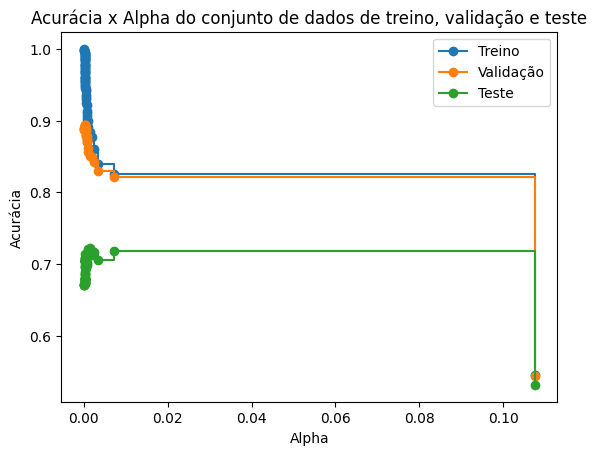

In [8]:
# Exc 5

X_test3 = X_test[[feature for feature in feature_importances_df.Feature][:3]]

test_scores = [clf.score(X_test3, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia x Alpha do conjunto de dados de treino, validação e teste')
ax.plot(ccp_alphas, train_scores, marker='o', label='Treino',
        drawstyle='steps-post')
ax.plot(ccp_alphas, validation_scores, marker='o', label='Validação',
        drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='Teste',
       drawstyle='steps-post')
ax.legend()
plt.show()

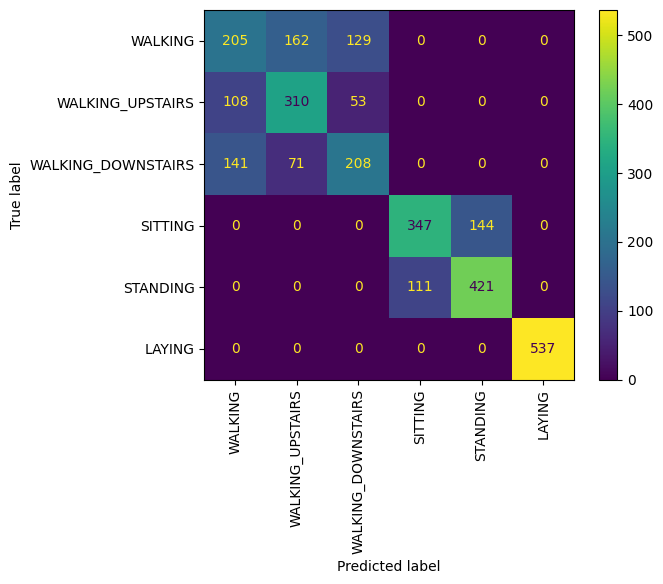

In [9]:
cm = confusion_matrix(y_test, best_tree.predict(X_test3))
disp = ConfusionMatrixDisplay(cm, display_labels=target.label)

disp.plot()

plt.xticks(rotation=90)
plt.show()

In [10]:
print(f'A acurácia da árvore criada na base de validação é igual a {best_tree.score(X_validation3, y_validation)*100:.2f}%')
print(f'A acurácia da mesma árvore na base de teste é igual a {best_tree.score(X_test3, y_test)*100:.2f}%')
print(f'Uma diferença de {best_tree.score(X_test3, y_test)*100 - best_tree.score(X_validation3, y_validation)*100:.2f}%')

A acurácia da árvore criada na base de validação é igual a 89.34%
A acurácia da mesma árvore na base de teste é igual a 68.82%
Uma diferença de -20.52%
